# Кластеризация

Кластеризация — задача группировки множества объектов на подмножества (кластеры) таким образом, чтобы объекты из одного кластера были более похожи друг на друга, чем на объекты из других кластеров по какому-либо критерию.

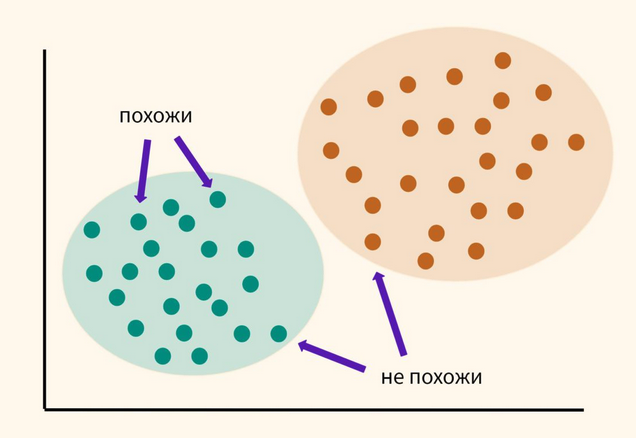

Задача кластеризации относится к классу задач обучения без учителя. 


## Цели кластеризации

* Классификация объектов. Попытка понять зависимости между объектами путем выявления их кластерной структуры. Разбиение выборки на группы схожих объектов упрощает дальнейшую обработку данных и принятие решений, позволяет применить к каждому кластеру свой метод анализа (стратегия «разделяй и властвуй»). В данном случае стремятся уменьшить число кластеров для выявления наиболее общих закономерностей;
* Сжатие данных. Можно сократить размер исходной выборки, взяв один или несколько наиболее типичных представителей каждого кластера. Здесь важно наиболее точно очертить границы каждого кластера, их количество не является важным критерием;
* Обнаружение новизны (обнаружение шума). Выделение объектов, которые не подходят по критериям ни в один кластер. Обнаруженные объекты в дальнейшем обрабатывают отдельно.

## Типы входных данных

* Признаковое описание объектов. Каждый объект описывается набором своих характеристик, называемых признаками (англ. features). Признаки могут быть как числовыми, так и категориальными;
* Матрица расстояний между объектами. Каждый объект описывается расстоянием до всех объектов из обучающей выборки.

## Алгоритм кластеризации Ллойда (K-средних, K-means)

Наиболее простой, но в то же время достаточно неточный метод кластеризации в классической реализации. Он разбивает множество элементов векторного пространства на заранее известное число кластеров k.

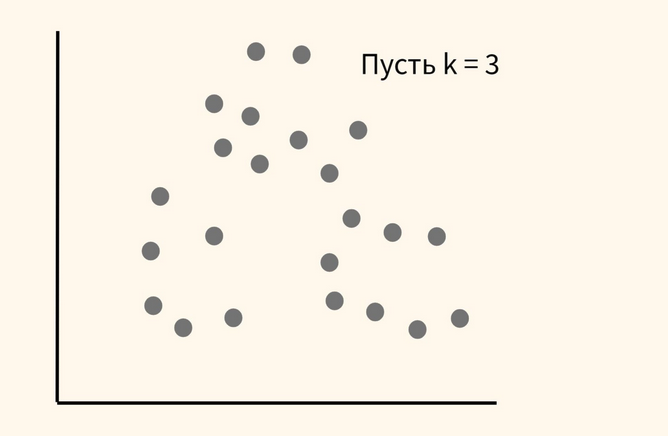

 Действие алгоритма таково, что он стремится минимизировать среднеквадратичное отклонение на точках каждого кластера. Основная идея заключается в том, что на каждой итерации перевычисляется центр масс для каждого кластера, полученного на предыдущем шаге, затем векторы разбиваются на кластеры вновь в соответствии с тем, какой из новых центров оказался ближе по выбранной метрике. Алгоритм завершается, когда на какой-то итерации не происходит изменения кластеров. 
 
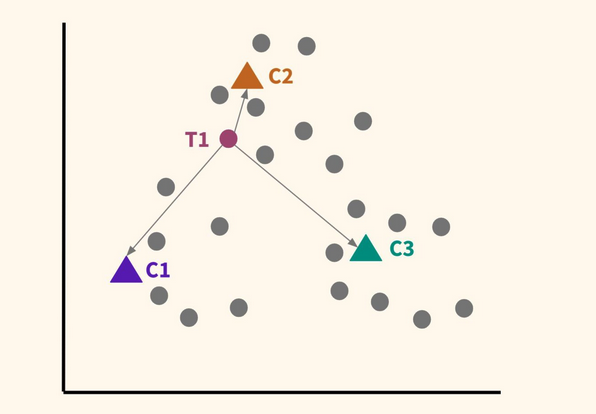

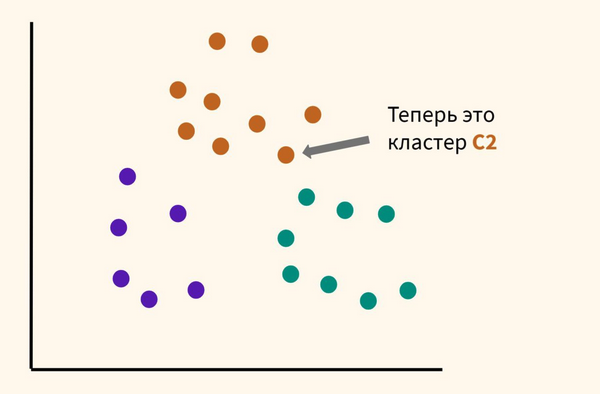

### Выбор количества кластеров
* Экспертный метод. Выбор количества кластеров будет зависеть от знания о предметной области (domain knowledge).
* Метод локтя (elbow method). Мы также можем (1) обучить модель используя несколько вариантов количества кластеров, (2) измерить сумму квадратов внутрикластерных расстояний и (3) выбрать тот вариант, при котором данное расстояние перестанет существенно уменьшаться.

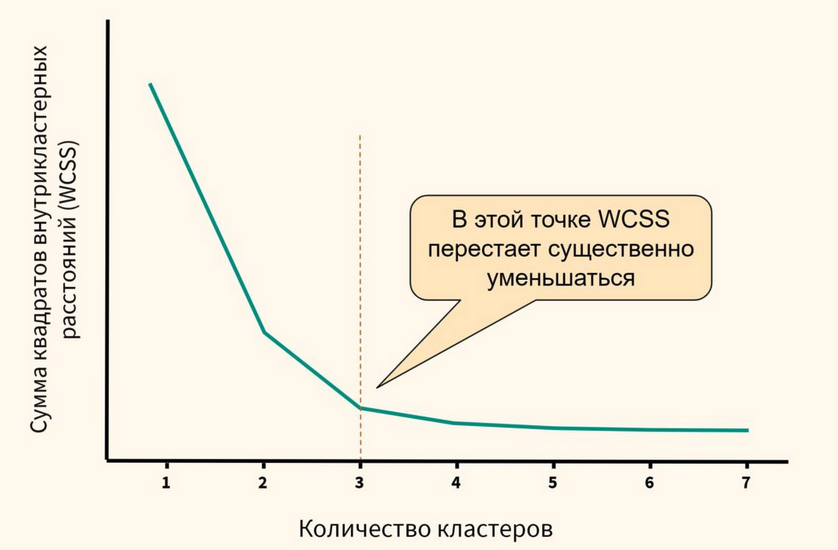

## Пример решения задачи кластеризации с помощью  scikit-learn

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Извлечение данных

In [7]:
# импортируем набор данных из модуля datasets библиотеки sklearn
from sklearn.datasets import load_iris
iris = load_iris()

### Подготовка данных

In [3]:
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
 
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [5]:
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [9]:
# импортируем необходимый класс из модуля preprocessing библиотеки sklearn
from sklearn.preprocessing import StandardScaler
 
# создадим объект этого класса
scaler = StandardScaler()
 
# приведем данные к единому масштабу 
iris_scaled = scaler.fit_transform(iris_df)
 
# заново создадим датафрейм с нормализованными значениями
iris_df_scaled = pd.DataFrame(iris_scaled, columns = iris.feature_names)
 
# посмотрим на первые пять строк
iris_df_scaled.round(2).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.90,1.02,-1.34,-1.32
1,-1.14,-0.13,-1.34,-1.32
2,-1.39,0.33,-1.40,-1.32
3,-1.51,0.10,-1.28,-1.32
4,-1.02,1.25,-1.34,-1.32


In [13]:
X = iris_df_scaled

### Предсказательная модель

Text(0, 0.5, 'WCSS')

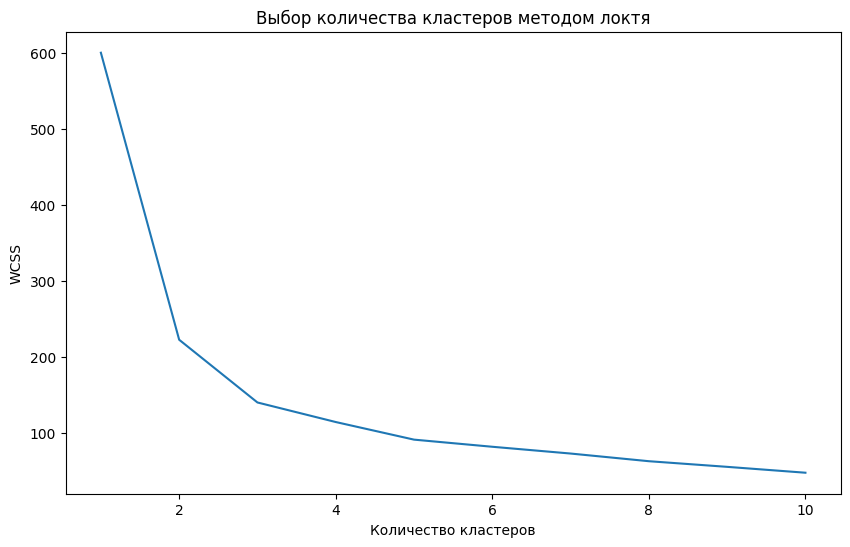

In [14]:
### Предсказательная модель
from sklearn.cluster import KMeans
 
# создадим пустой список для записи показателя WCSS (ошибки)
wcss = []
 
# воспользуемся новой для нас функцией range(), она возвращает последовательность чисел
# в данном случае числа от 1 до 10
for i in range(1, 11):
    
    # настроим параметры модели (подробнее об этом расскажу чуть дальше)
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
 
    # обучим модель на данных с разным количеством кластеров
    kmeans.fit(X)
 
    # для каждого кластера рассчитаем ошибку (атрибут inertia_) и поместим в список
    wcss.append(kmeans.inertia_)
 
# зададим размер график
plt.figure(figsize = (10,6))
# передадим функции plot() последовательность кластеров и ошибку WCSS
plt.plot(range(1, 11), wcss)
# и добавим подписи
plt.title('Выбор количества кластеров методом локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')

In [42]:
# заново обучим модель с тремя кластерами
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
kmeans.fit(X)

KMeans(n_clusters=3, n_init=10, random_state=42)


* n_clusters: это количество кластеров, на которые мы хотим разбить наблюдения;
* init: выбор первоначального расположения (инициализация) центроидов; есть два варианта, (1) выбрать центроиды случайно init = 'random' или (2) выбрать их так, чтобы центроиды с самого начала располагались максимально далеко друг от друга init = 'k-means++'; второй вариант оптимальнее;
* n_init: сколько раз алгоритм будет инициализирован, т.е. сколько раз будут выбраны центроиды до начала оптимизации; на выходе будет выбран тот вариант, где ошибка была минимальна;
* max_iter: максимальное количество итераций алгоритма после первоначального выбора центроидов;
* random_state: воспроизводимость результата.


In [44]:
y_pred = kmeans.fit_predict(X)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [45]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [46]:
# пройдемся списком по всему массиву y_pred
for i in range(len(y_pred)):
  # если было 1, заменим на 0
  if y_pred[i] == 1:
    y_pred[i] = 0
  # если было 0, будет 1
  elif y_pred[i] == 0:
    y_pred[i] = 1
  # если было 2, будет 1
  elif y_pred[i] == 2:
    y_pred[i] = 2

### Проверка модели

In [47]:
# поместим переменные в словарь
d = {'Target' : iris.target, 'Prediction' : y_pred}
 
# превратим словарь в датафрейм с соответствующими названиями столбцов
df = pd.DataFrame(d, columns = ['Target', 'Prediction'])

comparison = np.where(df['Target'] == df['Prediction'], True, False)
print(type(comparison))
print(comparison[:5])

<class 'numpy.ndarray'>
[ True  True  True  True  True]


In [49]:
df['Comparison'] = comparison
df.head()


,Target,Prediction,Comparison
0,0,0,True
1,0,0,True
2,0,0,True
3,0,0,True
4,0,0,True


In [50]:

df['Comparison'].value_counts(normalize = True).round(2)

Comparison
True     0.83
False    0.17
Name: proportion, dtype: float64

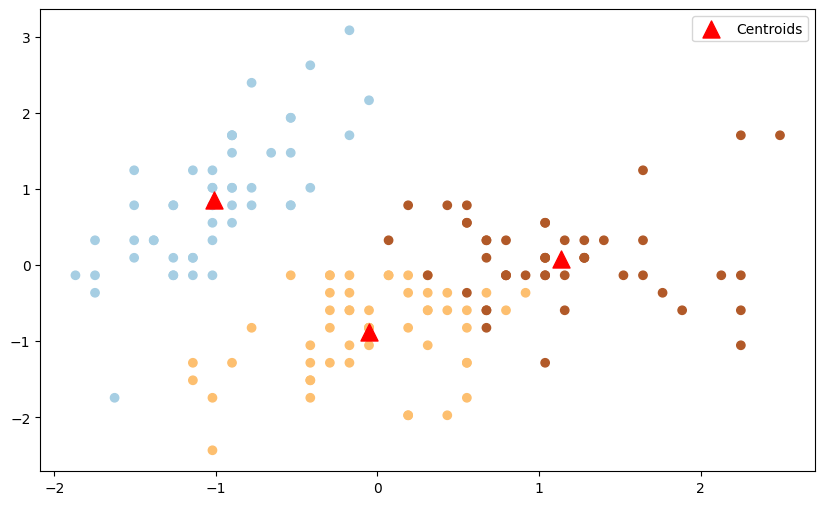

In [51]:
plt.figure(figsize = (10,6))

# снова построим точечную диаграмму, но коды точек возьмем из y_pred
plt.scatter(X.iloc[:,0], X.iloc[:,1], c = y_pred, cmap='Paired')

# кроме того выведем центроиды с помощью атрибута cluster_centers_
# зададим размер s = 150, красный цвет c = 'red', тип маркера - треугольник, и подпись
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 150, c = 'red', marker = '^', label = 'Centroids')

# укажем, где разместить легенду
plt.legend(loc = 'upper right')

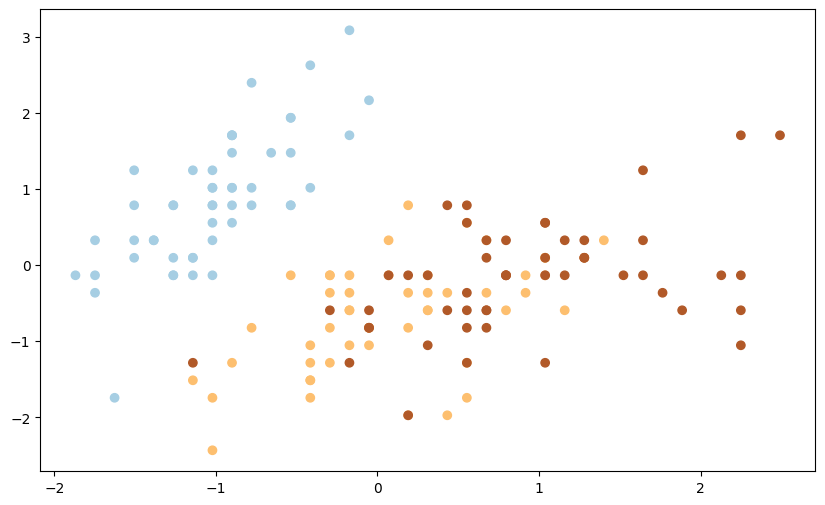

In [52]:
# посмотрим на целевую переменную с помощью точечной диаграммы

# зададим размер
plt.figure(figsize = (10,6))

# возьмем первый и второй столбцы с помощью функции iloc()
# параметр с задаст каждой точке определенный код (0, 1, 2), а
# camp определит цвет каждой из точек
plt.scatter(X.iloc[:,0], X.iloc[:,1], c = iris.target, cmap = 'Paired')